In [71]:
# !pip install matplotlib evaluate absl-py nltk rouge_score

import pandas as pd
import matplotlib.pyplot as plt
import evaluate


In [75]:
# Read the CSV file
df = pd.read_csv("model_comparison_10-Examples.csv")

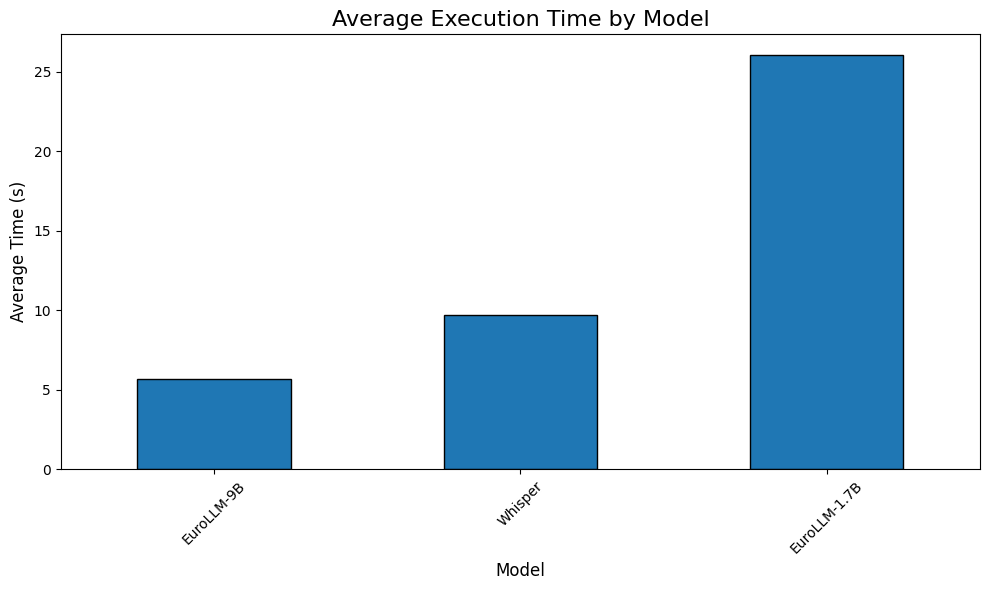

In [79]:
# Calculate the average time for each model
average_time = df.groupby("Model")["Time (s)"].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
average_time.plot(kind="bar", edgecolor="black")
plt.title("Average Execution Time by Model", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Average Time (s)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


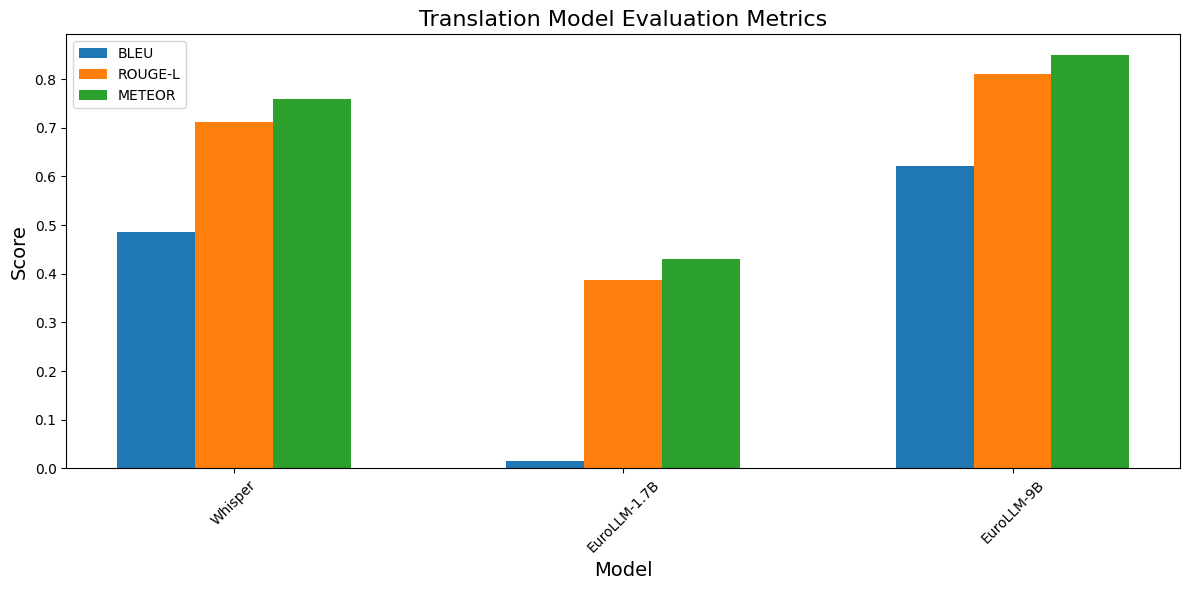

In [87]:

# Load metrics
bleu = evaluate.load("bleu", config_name="bleu")
rouge = evaluate.load("rouge", config_name="rougeL")
meteor = evaluate.load("meteor", config_name="meteor")

# Filter references (ground truth)
references = df[df["language"] == "English"]["Input"].drop_duplicates().tolist()

# Initialize results dictionary
results = {"Model": [], "BLEU": [], "ROUGE-L": [], "METEOR": []}

# Define models to evaluate
models = ["Whisper", "EuroLLM-1.7B", "EuroLLM-9B"]

# Evaluate each model
for model in models:
    # Filter model-specific data
    model_data = df[df["Model"] == model]
    predictions = model_data["Output"].tolist()

    # Prepare grouped predictions for each reference
    grouped_predictions = [predictions[i * 9:(i + 1) * 9] for i in range(len(references))]

    # Flatten references for evaluation
    expanded_references = [[ref] * 9 for ref in references]
    expanded_references = [item for sublist in expanded_references for item in sublist]

    # Flatten predictions for evaluation
    flattened_predictions = [pred for group in grouped_predictions for pred in group]

    # Compute metrics
    bleu_score = bleu.compute(predictions=flattened_predictions, references=expanded_references)["bleu"]
    rouge_score = rouge.compute(predictions=flattened_predictions, references=expanded_references)["rougeL"]
    meteor_score = meteor.compute(predictions=flattened_predictions, references=expanded_references)["meteor"]

    # Store results
    results["Model"].append(model)
    results["BLEU"].append(bleu_score)
    results["ROUGE-L"].append(rouge_score)
    results["METEOR"].append(meteor_score)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(12, 6))
x = range(len(results_df))

# Plot each metric
plt.bar(x, results_df["BLEU"], width=0.2, label="BLEU", align='center')
plt.bar([i + 0.2 for i in x], results_df["ROUGE-L"], width=0.2, label="ROUGE-L", align='center')
plt.bar([i + 0.4 for i in x], results_df["METEOR"], width=0.2, label="METEOR", align='center')

# Add labels and legend
plt.xticks([i + 0.2 for i in x], results_df["Model"], rotation=45)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Translation Model Evaluation Metrics", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()


In [88]:
results_df

,Model,BLEU,ROUGE-L,METEOR
0,Whisper,0.484766,0.712385,0.758547
1,EuroLLM-1.7B,0.014650,0.387230,0.430205
2,EuroLLM-9B,0.621982,0.811340,0.849650
